Cargamos las librerias que vamos a utilizar.

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

Al cargar el set de datos retorna cuatro arreglos en NumPy:

    El arreglo train_images y train_labels son los arreglos que training set el modelo de datos usa para aprender.
    el modelo es probado contra los arreglos test set, el test_images, y test_labels.

Las imagenes son arreglos de NumPy de dimensiones 28x28, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


De la misma manera necesitamos definir un vector que contenga todas las posibles clases a evaluar en nuestro modelo, esto nos va a servir para traducir los vectores de probabilidad a etiquetas de manera mas sencilla.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Podemos observar con el atributo shape el tamaño de nuestro dataset (6000 imagenes) asi como sus dimensiones (28x28).

In [4]:
train_images.shape

(60000, 28, 28)

Vamos a hacer la grafica de una figura, para esto tomaremos una de las imagenes del dataset y la graficaremos en un espacio de 28x28 con barra de colores (a mayor intensidad de color, mayor valor)

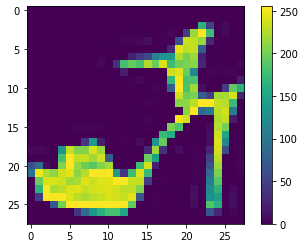

In [5]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

Convertimos el dataset de mapa de color a escala de grises.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Y por ejemplo, podemos ver diferentes caracteristicas de nuestro dataset con respecto a las diferentes etiquetas que este tiene, podemos observar las caracteristicas e inclusive entender la relacion que existe entre ellas.

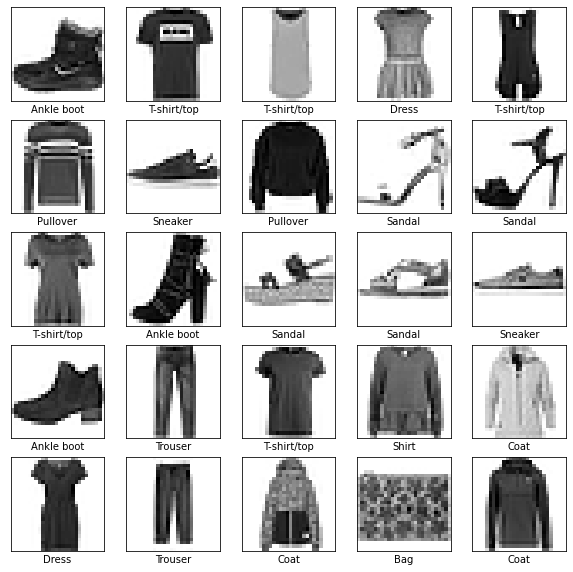

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Declaramos la arquitectura de la red que vamos a utilizar, este dataset tiene la peculiaridad de que puede ser resuelto (clasificado) con diferentes arquitecturas, utilizaremos una red neuronal densa unicamente para propositos didacticos.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo, de la misma manera que lo hicimos anteriormente, solamente que esta vez utilizamos un optimizador diferente y un medidor de perida diferente, esto debido a las caracteristicas de este particular dataset.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos el modelo

In [10]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4941 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2580 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2465 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

Y realizamos las pruebas posteriores al entrenamiento con el set de datos de pruebas que previamente separamos.

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3357 - accuracy: 0.8847 - 497ms/epoch - 2ms/step

Test accuracy: 0.8847000002861023


Podemos por ejemplo, clasificar una sola imagen utilizando una de las imagenes del dataset, a continuacion imprimimos el vector de probablidad.

In [13]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.5113070e-06, 1.0358401e-10, 5.6679465e-07, 1.5360238e-09,
       5.1270208e-06, 1.3818768e-03, 3.9060115e-08, 5.8139428e-02,
       1.8457662e-06, 9.4046956e-01], dtype=float32)

Y con una simple funcion de argumento maximo (argmax) podemos obtener cual de las etiquetas es la que tiene el valor mas probable.

In [14]:
label = np.argmax(predictions[0])
print(label)
class_names[label]

9


'Ankle boot'

Pero bueno, eso no nos dice mucho, asi que vamos a realizar el proceso de hacer las pruebas autoexplicativas, para esto creamos dos funciones, una que nos permita realizar el graficado de las imagenes y otra que nos permita crear graficos para las diferentes clasificaciones.

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Entonces por ejemplo, podemos realizar estos conjuntos, que nos permite saber que tanta certeza tiene nuestro modelo de clasificacion, de que un conjunto de datos (una imagen) es su respectiva clase y que otras posibles clases es, dados sus atributos.

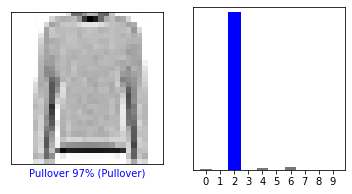

In [19]:
i = 338

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Y de la misma manera, podemos probar para diferentes numeros de objetos.

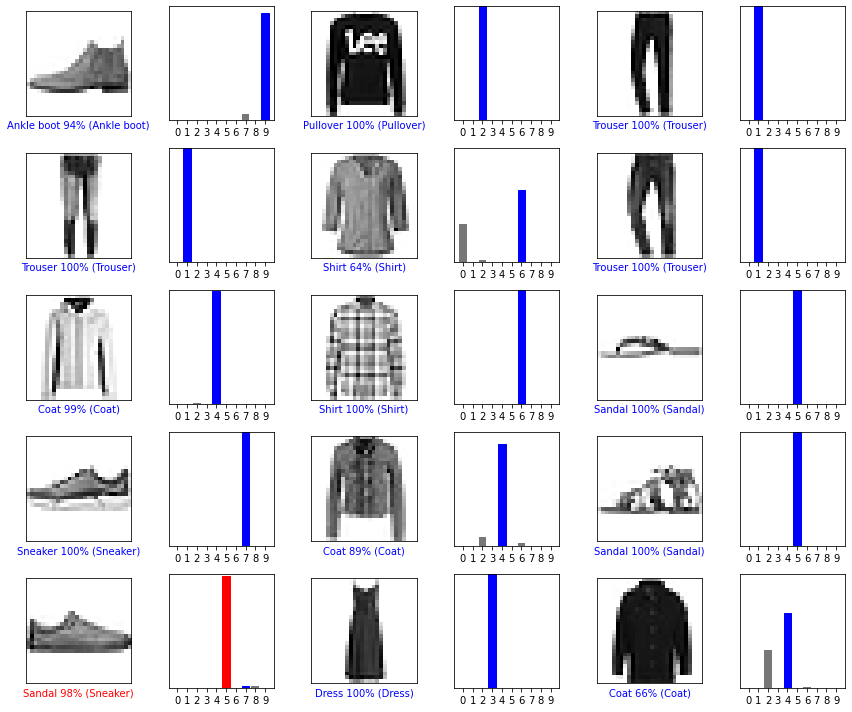

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()